In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('multiclass.csv')

In [3]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204,2
436,3,39228,1431,764,4510,93,2346,2
437,3,14531,15488,30243,437,14841,1867,2
438,3,10290,1981,2232,1038,168,2125,3


In [4]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [5]:
df.shape

(440, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64

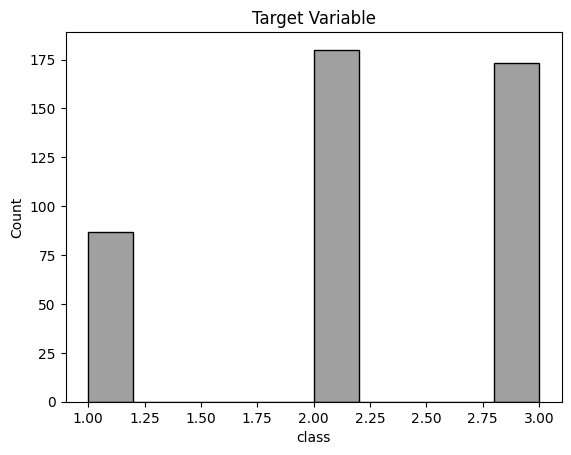

In [8]:
sns.histplot(x='class', data=df, color='grey')
plt.title('Target Variable')
plt.show()

In [9]:
df['class'].value_counts()

class
2    180
3    173
1     87
Name: count, dtype: int64

-- Dividing the dataset into features and target attributes

In [10]:
X = df.drop('class', axis=1)

In [11]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [12]:
y = df['class']

In [13]:
y.head()

0    2
1    2
2    2
3    1
4    1
Name: class, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [17]:
X_train.shape, y_train.shape

((281, 7), (281,))

In [18]:
X_val.shape, y_val.shape

((71, 7), (71,))

In [19]:
X_test.shape, y_test.shape

((88, 7), (88,))

In [20]:
y_train.value_counts()

class
2    115
3    110
1     56
Name: count, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [22]:
X_sm

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2427,7097,10391,1127,4314,1468
1,2,9790,1786,5109,3570,182,1043
2,2,9155,1897,5167,2714,228,1113
3,3,3097,4230,16483,575,241,2080
4,3,514,7677,19805,937,9836,716
...,...,...,...,...,...,...,...
340,2,11035,6311,5057,893,220,386
341,3,9609,767,1019,1940,564,353
342,3,2653,2766,2309,906,96,1842
343,2,2148,1610,2436,589,180,711


In [23]:
y_sm

0      2
1      3
2      3
3      2
4      2
      ..
340    3
341    3
342    3
343    3
344    3
Name: class, Length: 345, dtype: int64

In [24]:
y_sm.value_counts()

class
2    115
3    115
1    115
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_sm = scaler.fit_transform(X_sm)

In [28]:
X_sm

array([[-1.75283315, -0.93241555,  0.24625823, ..., -0.40916498,
         0.32697022, -0.01048161],
       [-0.52371234, -0.25164891, -0.4591398 , ...,  0.10601834,
        -0.50596245, -0.15328644],
       [-0.52371234, -0.3103596 , -0.44439697, ..., -0.07449616,
        -0.49668973, -0.12976565],
       ...,
       [ 0.70540846, -0.91152009, -0.32897786, ..., -0.45576977,
        -0.52329842,  0.11518665],
       [-0.52371234, -0.95821127, -0.48251582, ..., -0.52261919,
        -0.50636562, -0.26484222],
       [-0.52371234, -0.27106504, -0.40043411, ..., -0.42455932,
        -0.49144862, -0.35993344]])

In [29]:
X_val = scaler.transform(X_val)

In [30]:
X_val[:10]

array([[ 0.70540846, -1.13831902,  2.73859377,  1.21344864, -0.50954454,
         1.22581987,  1.59632482],
       [ 0.70540846, -0.3846032 , -0.32180567, -0.62466629, -0.48255172,
        -0.41041306, -0.45536068],
       [-1.75283315, -0.69073091, -0.54826088, -0.46956325,  0.93393882,
        -0.49104546, -0.37774205],
       [-0.52371234,  0.90693954, -0.26920962, -0.60938423, -0.18120216,
        -0.50676878,  0.3705553 ],
       [-1.75283315, -0.94008954,  0.72188059, -0.37310762, -0.34336997,
        -0.22697436, -0.33910074],
       [ 0.70540846, -0.93065885,  0.26790762, -0.35673398,  0.59104562,
        -0.38380437,  0.53620891],
       [ 0.70540846, -0.96024534, -0.25951388, -0.42738872, -0.32312536,
        -0.49527866,  0.96294337],
       [ 0.70540846, -0.940182  ,  0.34560633,  0.42533069, -0.63586251,
         0.30318366,  0.066465  ],
       [-1.75283315, -0.13311803,  0.09909555, -0.19577612,  1.107916  ,
        -0.35014034,  0.21431001],
       [-0.52371234, -0.0658

In [31]:
X_test = scaler.transform(X_test)

In [32]:
X_test[:10]

array([[-1.75283315, -0.61047755,  2.42846302,  0.60643309,  1.49467253,
        -0.37533797,  0.71799107],
       [ 0.70540846, -0.16141011, -0.54029179, -0.54785903, -0.20482088,
        -0.48197431, -0.44763242],
       [ 0.70540846,  1.37468345,  0.25781342,  0.46869603, -0.05446242,
         0.38885558, -0.16034268],
       [-1.75283315,  1.7661497 , -0.63140514, -0.60462099,  0.03684924,
        -0.5202747 , -0.29709932],
       [-0.52371234, -1.10669846, -0.57694964, -0.58785041, -0.55952344,
        -0.52491107, -0.32834837],
       [ 0.70540846, -0.60002982, -0.25088069, -0.4293734 , -0.11814861,
        -0.49991502, -0.27324251],
       [ 0.70540846, -1.12657689, -0.57442609, -0.28558306, -0.63122312,
        -0.47532214, -0.50005019],
       [ 0.70540846, -0.19876306,  0.52982532,  0.33949311, -0.49140873,
         0.17034178,  0.28319234],
       [ 0.70540846, -0.20542002, -0.43324023, -0.53148539, -0.42793343,
        -0.50878459,  0.21027787],
       [ 0.70540846, -0.5203

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [35]:
knn.fit(X_sm, y_sm)

KNeighborsClassifier(metric='euclidean')

In [36]:
round(knn.score(X_val, y_val)*100,2)

91.55